# Analyse Exploratoire des Données (EDA)

## Chargement les données nettoyées et faire des statistiques descriptives

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données nettoyées
df = pd.read_csv(r"C:\Users\STEVE\desktop\house-price-prediction-france\data\processed\2024\full_clean.csv.gz", compression="gzip", sep=",", low_memory=False)

# Afficher les premières lignes
df.head()

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,code_postal,nom_commune,type_local,longitude,latitude
0,329500.0,89,4,1170.0,Gex,Appartement,6.058695,46.332212
1,94500.0,32,2,1150.0,Lagnieu,Appartement,5.348768,45.904292
2,94500.0,74,3,1150.0,Lagnieu,Appartement,5.348768,45.904292
3,220000.0,40,1,1640.0,Boyeux-Saint-Jérôme,Maison,5.461880,46.020243
4,220000.0,80,2,1640.0,Boyeux-Saint-Jérôme,Maison,5.461676,46.020164


In [15]:
# Aperçu des valeurs manquantes et types de données
df.info()

# Statistiques descriptives
df.drop(columns=['code_postal','longitude','latitude']).describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468856 entries, 0 to 468855
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   valeur_fonciere            468856 non-null  float64
 1   surface_reelle_bati        468856 non-null  int64  
 2   nombre_pieces_principales  468856 non-null  int64  
 3   code_postal                468806 non-null  float64
 4   nom_commune                468856 non-null  object 
 5   type_local                 468856 non-null  object 
 6   longitude                  465012 non-null  float64
 7   latitude                   465012 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 28.6+ MB


,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales
count,4.688560e+05,468856.000000,468856.000000
mean,3.562028e+05,86.115155,3.124168
std,7.605498e+05,72.038479,1.794280
min,1.000000e+03,5.000000,0.000000
25%,1.140575e+05,48.000000,2.000000
50%,1.900000e+05,74.000000,3.000000
75%,3.200000e+05,102.000000,4.000000
max,1.000000e+07,1000.000000,70.000000


C:\Users\STEVE\AppData\Local\Temp\ipykernel_21860\2976122000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["type_local"], palette="pastel")


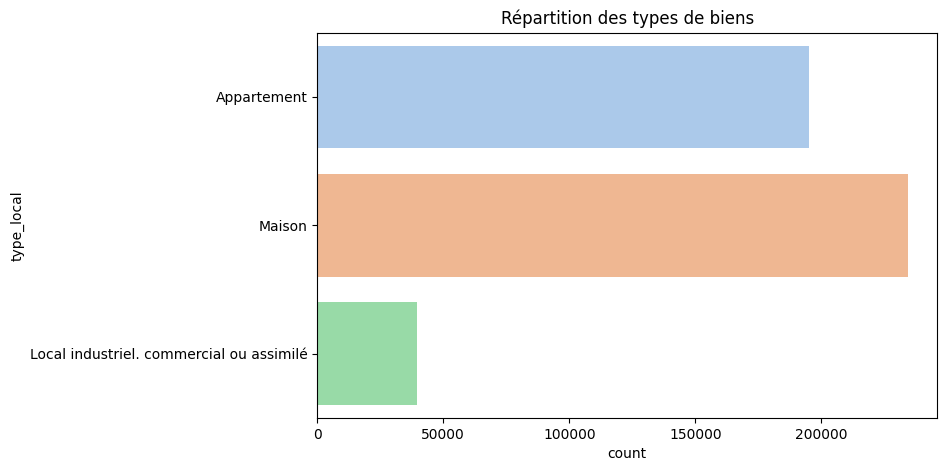

In [16]:
# Distribution des types de logements
plt.figure(figsize=(8, 5))
sns.countplot(y=df["type_local"], palette="pastel")
plt.title("Répartition des types de biens")
plt.show()

##### **Interprétation** : Ce graphique montre la répartition des différents types de logements dans les données. On peut observer que les maisons sont les plus nombreux, suivis des appartements.

## Analyse des prix immobiliers

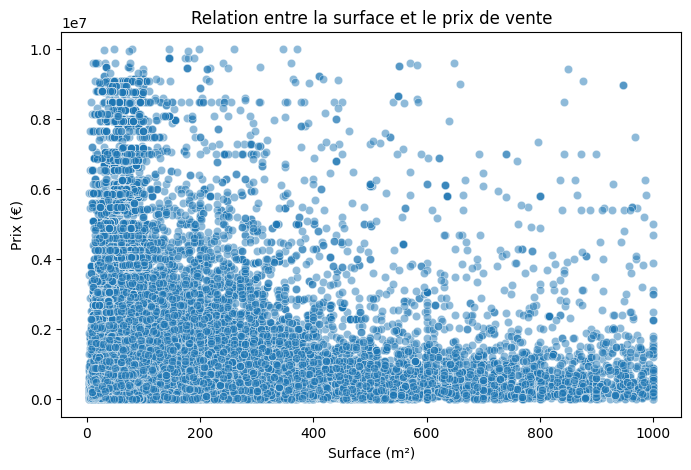

In [5]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["surface_reelle_bati"], y=df["valeur_fonciere"], alpha=0.5)
plt.xlabel("Surface (m²)")
plt.ylabel("Prix (€)")
plt.title("Relation entre la surface et le prix de vente")
plt.show()

##### **Interprétation** : Le graphique ci-dessus montre la relation entre la surface réelle bâtie (en m²) et la valeur foncière (en €) des biens immobiliers. Chaque point représente une transaction immobilière.
##### - **Tendance générale** : On observe une tendance générale où la valeur foncière augmente pendant que la surface réelle bâtie diminue. Cela signifie que, généralement, les biens immobiliers moins grands ont une valeur foncière plus élevée majoritairement dans les villes ou des logements de grandes surfaces sont moins achetés.
##### - **Dispersion des données** : Il y a une grande concentration des points près des axes, ce qui indique une dépendance significative des prix pour des surfaces similaires. Cette varia peut être due à d'autres facteurs tels que l'emplacement, l'état du bien, les équipements, etc.
##### - **Points extrêmes** : Certains points se trouvent très loin de la tendance générale, ce qui peut indiquer des transactions exceptionnelles ou des erreurs dans les données.
##### En résumé, bien que la surface réelle bâtie soit un facteur important dans la détermination de la valeur foncière, d'autres variables doivent également être prises en compte pour expliquer pleinement les variations de prix.

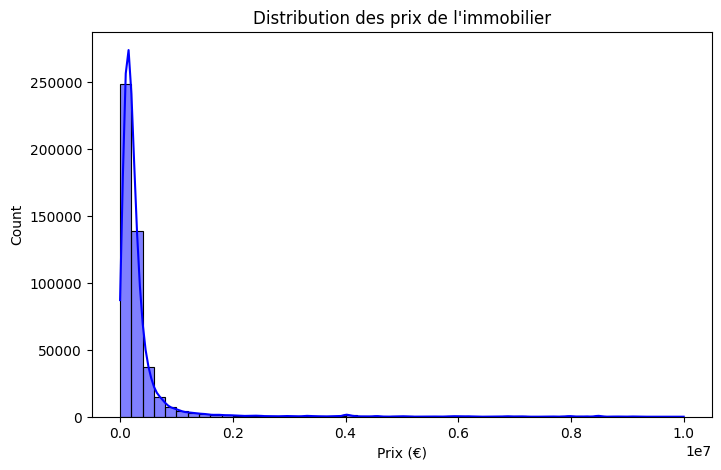

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df["valeur_fonciere"], bins=50, kde=True, color="blue")
plt.xlabel("Prix (€)")
plt.title("Distribution des prix de l'immobilier")
plt.show()

##### **Interprétation** : Le graphique ci-dessus montre la distribution des prix de l'immobilier. On observe que la majorité des transactions immobilières se situent dans une gamme de prix relativement basse, avec une longue traîne vers les prix plus élevés. Cela indique que la plupart des biens immobiliers ont des prix modérés, tandis que quelques biens de luxe atteignent des prix très élevés. La courbe de densité (kde) superposée au histogramme permet de visualiser la tendance générale de la distribution des prix.

## Analyse des prix par ville

C:\Users\STEVE\AppData\Local\Temp\ipykernel_21860\3853077922.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_villes.values, y=top_villes.index, palette="coolwarm")


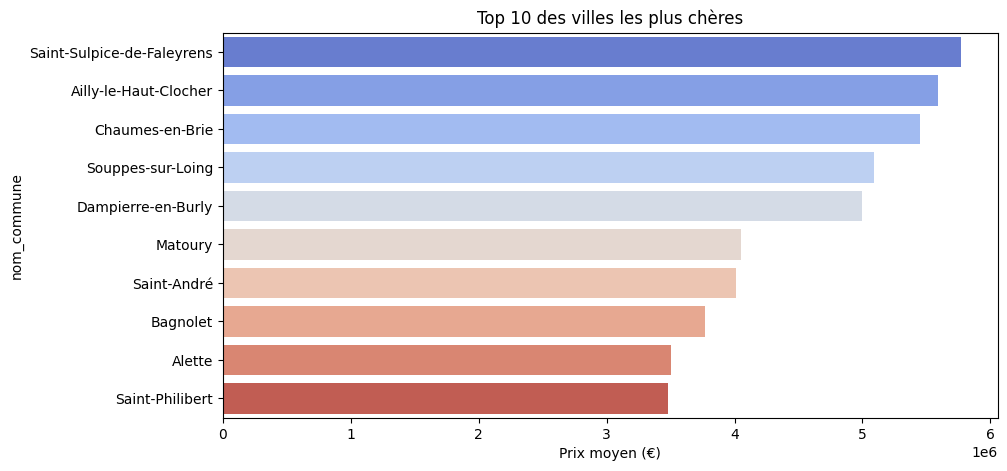

In [7]:
top_villes = df.groupby("nom_commune")["valeur_fonciere"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_villes.values, y=top_villes.index, palette="coolwarm")
plt.xlabel("Prix moyen (€)")
plt.title("Top 10 des villes les plus chères")
plt.show()

##### **Interprétation** : Le graphique ci-dessus montre les 10 villes les plus chères en termes de prix moyen des biens immobiliers. On observe que Saint-Sulpice-de-Faleyrens est la ville la plus chère, avec un prix moyen de plus de 5,7 millions d'euros. Les autres villes dans le top 10 ont également des prix moyens très élevés, dépassant souvent les 3 millions d'euros. Ces prix élevés peuvent être dus à divers facteurs tels que la localisation géographique, la demande élevée, la rareté des biens disponibles, et les caractéristiques spécifiques des propriétés dans ces villes.

## Visualisation géographique des prix (Heatmap)

In [8]:
pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/81/4d/bcbee0676dc06f0b014a030cb928e158c96daafb872a01ddee7e60a8c998/folium-0.19.5-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/f8/9d/91cddd38bd00170aad1a4b198c47b4ed716be45c234e09b835af41f4e717/branca-0.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for jinja2>=2.9 from https://files.pythonhosted.org/packages/62/a1/3d680cbfd5f4b8f15abc1d571870c5fc3e594bb582bc3b64ea099db13e56/jinja2-3.1.6-py3-none-any.whl.metadata
  Obtaining dependency information for xyzservices from https://files.pythonhosted.org/packages/9a/6e/49408735dae940a0c1c225c6b908fd83bd6e3f5fae120f865754e72f78cb/xyzservices-2025.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for MarkupSafe>=2.0 from https://files.pythonhosted.org/packages/c1/80/a61f99dc3a936413c3ee4e1eecac96c0da5ed07ad56fd975f1a9da5bc630/MarkupSafe-3.0.


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import folium
from folium.plugins import HeatMap

# Filtrer les données pour éviter une carte trop dense
df_map = df[["latitude", "longitude", "valeur_fonciere"]].dropna().sample(1000, random_state=42)

# Créer une carte centrée sur la France
map = folium.Map(location=[46.603354, 1.888334], zoom_start=6)

# Ajouter une heatmap des prix
heat_data = [[row["latitude"], row["longitude"], row["valeur_fonciere"]] for _, row in df_map.iterrows()]
HeatMap(heat_data, radius=10).add_to(map)

# Affichage de la carte
map

##### **Interprétation de la carte des prix immobiliers**

##### La carte ci-dessus montre une heatmap des prix immobiliers en France. Les zones rouges indiquent des régions où les prix sont les plus élevés, tandis que les zones bleues ou vertes représentent des régions avec des prix plus bas.

##### - **Concentration des prix élevés** : On observe une forte concentration de points chauds dans les grandes villes comme Paris, Lyon, et Marseille, ce qui indique des prix immobiliers élevés dans ces zones urbaines.
##### - **Répartition géographique** : Les prix élevés sont principalement concentrés dans les grandes villes et les zones côtières, tandis que les zones rurales montrent des prix plus bas.
##### - **Anomalies** : Quelques points chauds isolés peuvent indiquer des transactions exceptionnelles ou des propriétés de luxe situées en dehors des zones urbaines principales.

##### En résumé, la carte permet de visualiser les disparités géographiques des prix immobiliers en France, mettant en évidence les zones à forte demande et les régions plus abordables.